In [1]:
import glob
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CV vs Leader board

In [2]:
leaderboard = pd.read_csv('LeaderBoard.csv').sort_values('Filename', ascending=False)
leaderboard

,Filename,Metric
8,011_submission.csv,0.9155
7,010_submission.csv,0.9357
6,009_submission.csv,0.9492
5,008_submission.csv,0.9081
4,006_submission.csv,1.0286
0,005_submission.csv,0.8728
1,004_submission.csv,1.2826
2,002_submission.csv,1.0718
3,001_submission.csv,1.0594


In [3]:
metrics = []
for filepath in glob.glob(os.path.join('exp*', 'metrics.json')):
    with open(filepath, 'r') as f:
        metric = json.load(f)
    cv = metric['valid_losses_avg']
    dirname = os.path.split(os.path.dirname(filepath))[-1]
    submission_filename = dirname.replace('exp', '') + '_submission.csv'
    metrics.append([submission_filename, cv])
metrics = pd.DataFrame(data=metrics, columns=['Filename', 'CV']).sort_values('Filename', ascending=False)
metrics

,Filename,CV
10,011_submission.csv,0.924003
9,010_submission.csv,0.944536
8,009_submission.csv,0.968231
7,008_submission.csv,0.908720
6,007_submission.csv,0.971659
5,006_submission.csv,1.032317
4,005_submission.csv,0.880975
3,004_submission.csv,1.339520
2,003_submission.csv,1.183930
1,002_submission.csv,1.082669


In [4]:
cv_lb = pd.merge(metrics, leaderboard, how='left').sort_values('Filename', ascending=False)
cv_lb

,Filename,CV,Metric
0,011_submission.csv,0.924003,0.9155
1,010_submission.csv,0.944536,0.9357
2,009_submission.csv,0.968231,0.9492
3,008_submission.csv,0.908720,0.9081
4,007_submission.csv,0.971659,NaN
5,006_submission.csv,1.032317,1.0286
6,005_submission.csv,0.880975,0.8728
7,004_submission.csv,1.339520,1.2826
8,003_submission.csv,1.183930,NaN
9,002_submission.csv,1.082669,1.0718


,CV,Metric
CV,1.000000,0.997216
Metric,0.997216,1.000000


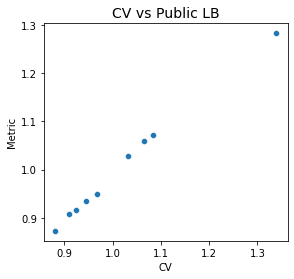

In [5]:
ax = sns.scatterplot(data=cv_lb, x='CV', y='Metric')
ax.set_aspect('equal')
ax.set_title('CV vs Public LB', fontsize=14)
display(cv_lb.corr())

# Compare submission files

## Corerration matrix

In [6]:
submissions = pd.DataFrame()
for filepath in glob.glob(os.path.join('exp*', '*_submission.csv')):
    df = pd.read_csv(filepath)
    submissions[os.path.split(filepath)[0]] = df['target'].values
submissions

,exp001,exp002,exp003,exp004,exp005,exp006,exp007,exp008,exp009,exp010,exp011
0,1,1,1,3,1.442023,1,2,1.239809,1.616103,1.800699,1.281646
1,1,1,3,3,1.402051,2,2,1.815694,1.680383,1.628654,1.831477
2,2,2,2,2,1.738327,2,2,1.617090,2.053622,1.618650,1.437796
3,3,3,2,3,1.583645,2,2,2.303409,2.072835,1.980978,2.778739
4,1,1,3,0,1.224837,2,2,0.241458,1.763209,0.627268,0.146694
...,...,...,...,...,...,...,...,...,...,...,...
5914,3,3,2,1,2.628905,3,3,2.686372,1.529808,3.000000,2.925492
5915,2,1,2,2,1.519208,2,2,1.045690,1.285213,0.912846,1.123205
5916,2,2,2,3,1.920784,2,2,1.764494,2.297179,1.792497,2.191094
5917,2,2,3,2,1.823713,2,2,2.368674,2.019712,2.760527,1.866233


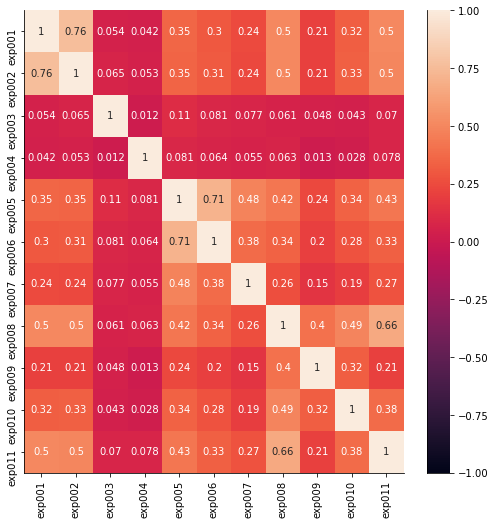

In [7]:
plt.figure(figsize=(8.5, 8.5))
sns.heatmap(submissions.corr(), vmin=-1, vmax=1, annot=True)
sns.despine()

## Pairplot

<Figure size 612x612 with 0 Axes>

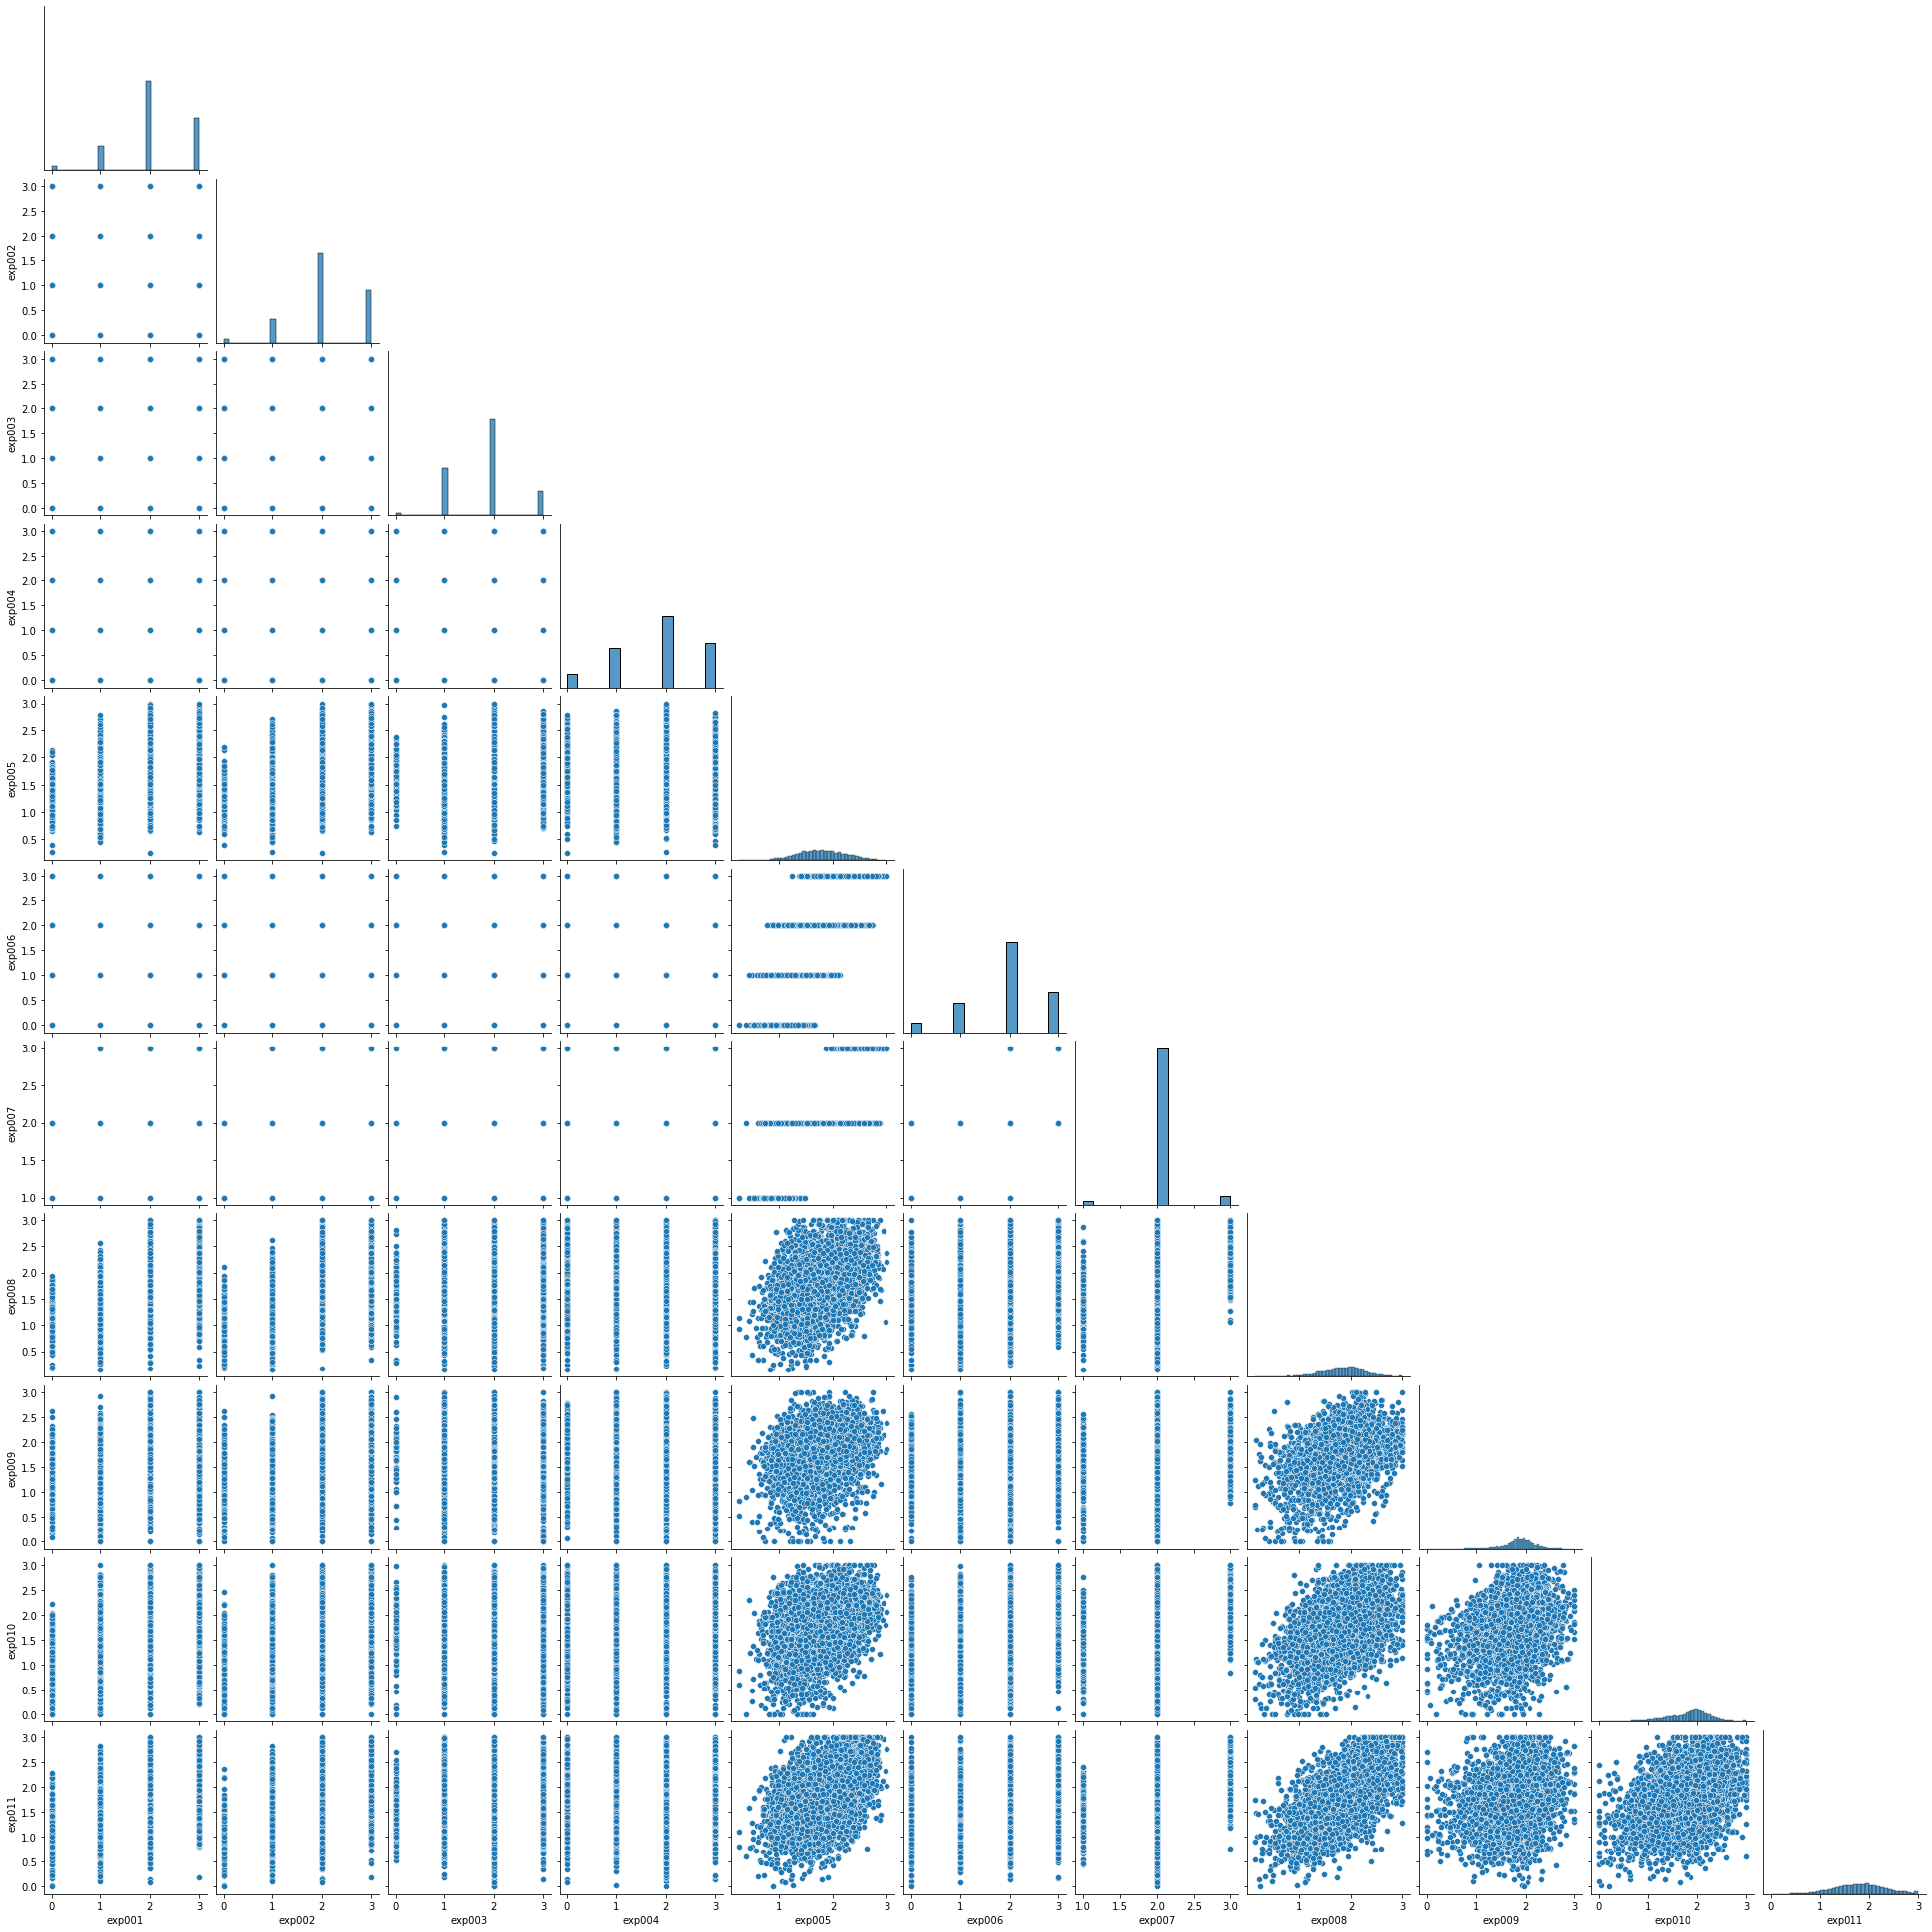

In [8]:
plt.figure(figsize=(8.5, 8.5))
sns.pairplot(submissions, corner=True)
sns.despine()